<a href="https://colab.research.google.com/github/zaman69/deep_learning_codes-_projects/blob/main/Visualizing_Filters_of_a_CNN_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Summary##
 Visualizing CNN Filters in VGG16
In this project, you will explore how Convolutional Neural Networks (CNNs)—specifically the VGG16 model—"see" and interpret different visual patterns.

You’ll learn to:

Understand the internal structure of a CNN by extracting intermediate layers.

Use transfer learning by loading a pretrained model (VGG16) trained on the ImageNet dataset.

Visualize what individual filters (neurons) in a CNN layer respond to by generating synthetic images that activate those filters the most.

Apply gradient ascent to a random image to create visual representations of the features each filter is trained to detect (e.g., edges, textures, shapes).

Interpret how early layers detect basic patterns and deeper layers recognize complex structures.

By the end, you’ll gain a practical and visual understanding of:

How CNNs extract features from images

How filters evolve through layers

And how to interpret the model’s internal learning process — a key step toward explainable AI (XAI).

This notebook is an excellent learning tool for beginners and intermediate learners looking to demystify how deep learning "sees" images.

## Task 2: Downloading the Model

# Visualizing Filters of a Convolutional Neural Network

In [2]:
# This magic command allows matplotlib plots to appear inline within the notebook output.
%matplotlib inline

# Import the TensorFlow library for building and training machine learning models.
import tensorflow as tf

# Import matplotlib.pyplot for data visualization (e.g., plotting graphs or images).
import matplotlib.pyplot as plt

# Import the random module to allow random selections (useful for sampling data, etc.).
import random

# Print the version of TensorFlow being used in the notebook.
print('Using TensorFlow', tf.__version__)


Using TensorFlow 2.18.0


In [4]:
# Load the VGG16 model architecture with pretrained weights from ImageNet.
# This model was trained on 1.2 million images across 1000 categories.
# We exclude the top (fully connected) layers because we want to use VGG16 as a feature extractor.
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,         # Remove the original classifier head
    weights='imagenet',        # Use pretrained weights from ImageNet
    input_shape=(96, 96, 3)    # Input shape for our images
)

# Print the structure of the model to see the layer names and output shapes.
model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Get Layer Output

In [5]:
def get_submodel(layer_name):
    return tf.keras.models.Model(
        model.input,
        model.get_layer(layer_name).output
    )

get_submodel('block1_conv2').summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 38,720 (151.25 KB)

 Non-trainable params: 0 (0.00 B)

🧠 What It Does:


Creates a Sub-Model
The function get_submodel(layer_name) takes the full VGG16 model and builds a new model that:

Starts with the same input as VGG16.

Ends at the specified layer (e.g., 'block1_conv2').

Returns Output from an Intermediate Layer
The new model will stop at that intermediate layer, instead of going all the way to the end (classification).

model.get_layer(layer_name).output
This part fetches the output tensor (feature map) of any named layer — such as 'block1_conv2', 'block3_conv1', etc.

Summary Display
When you call .summary(), it shows the layers of this submodel: from input to the selected layer.

🧩 Why This Is Useful:
Use Case	Why It Helps
Feature Visualization	You can visualize what the network sees at early, middle, or late stages.
Explainable AI (XAI)	You can use Grad-CAM, saliency maps, etc., on specific layers.
Transfer Learning	You may want to use feature maps from intermediate layers as input to another model.
Debugging Models	You can see if the model is learning meaningful patterns in early layers.

## Task 4: Image Visualization

In [7]:
# Define a function to plot an image using matplotlib.
# This function normalizes the image data for better display and removes axes ticks.
def plot_image(image, title='random image'):
    # Normalize the image so that pixel values are in the range [0, 1].
    # Subtract the minimum pixel value from all pixels.
    image = image - tf.math.reduce_min(image)

    # Divide by the new max value to scale all pixels between 0 and 1.
    image = image / tf.math.reduce_max(image)

    # Display the image using matplotlib.
    plt.imshow(image)

    # Set the title of the plot (default is 'random image').
    plt.title(title)

    # Remove the x and y axis ticks for cleaner display.
    plt.xticks([])
    plt.yticks([])

    # Show the final image.
    plt.show()


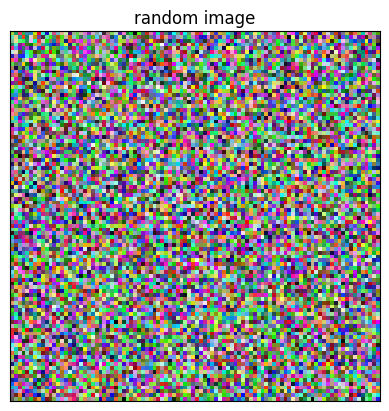

In [8]:
image = tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)
plot_image(image)

 1. tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)
This creates a random image tensor with shape (96, 96, 3) — meaning:

96 pixels height

96 pixels width

3 color channels (RGB)

The pixel values are sampled uniformly between -0.5 and 0.5

So it includes negative and positive values, like a noisy image or a random feature map.

## Task 5: Training Loop

In [10]:
def visualize_filter(layer_name, lr=20, iters=50, f_index=None):
    submodel = get_submodel(layer_name)

    num_filters = submodel.output.shape[-1]

    if not f_index:
        f_index = random.randint(0, num_filters - 1)

    assert num_filters > f_index, f'f_index ({f_index}) >= num_filters ({num_filters})'

    print(f'Maximizing image for layer {layer_name} and filter {f_index}')

    image = tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)

    for i in range(0, iters):
        with tf.GradientTape() as tape:
            tape.watch(image)
            output = submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
            loss = tf.math.reduce_mean(output)
        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize(grads)
        image += grads * lr

    plot_image(image, f'{layer_name} ({f_index})')

The purpose of visualize_filter() is to generate an image that maximally activates a specific filter in a CNN layer (like block1_conv2 in VGG16). This lets us see what the filter has learned to look for (edges, textures, patterns, etc.).

🔍 FULL FUNCTION WITH DETAILED EXPLANATION:

def visualize_filter(layer_name, lr=20, iters=50, f_index=None):
layer_name: The name of the layer in VGG16 (e.g., 'block1_conv2').

lr: Learning rate – how fast the image is updated at each step.

iters: Number of steps to update the image.

f_index: Which filter (channel) in that layer you want to visualize. If None, pick one randomly.

    submodel = get_submodel(layer_name)
This creates a partial model using the earlier get_submodel() function.

It stops at the chosen layer, so we can extract activations from it only.


    num_filters = submodel.output.shape[-1]
Counts how many filters are in this layer.

For example, 'block1_conv2' in VGG16 has 64 filters.


    if not f_index:
        f_index = random.randint(0, num_filters - 1)
If you didn’t specify which filter to visualize, it picks a random one.

    assert num_filters > f_index, f'f_index ({f_index}) >= num_filters ({num_filters})'
Safety check to make sure the filter index is valid.


    print(f'Maximizing image for layer {layer_name} and filter {f_index}')
Just tells you which filter and layer are being visualized.


    image = tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)
Starts with a completely random image (noise).

Shape: 96x96 pixels with 3 color channels (RGB).

Pixel values are between -0.5 and +0.5.

🚀 Main Loop: "Optimize" the image to activate the filter

    for i in range(0, iters):
Do the optimization for a number of iterations (default = 50).

Inside the loop:

        with tf.GradientTape() as tape:
            tape.watch(image)
GradientTape lets TensorFlow watch the image so we can compute gradients (changes).

We're going to ask: "How do I change this image to increase activation of the filter?"


            output = submodel(tf.expand_dims(image, axis=0))[:, :, :, f_index]
Pass the image through the submodel.

expand_dims adds a batch dimension (shape becomes [1, 96, 96, 3]).

Then we isolate the activation map for the chosen filter index (f_index).

            loss = tf.math.reduce_mean(output)
This is the loss function.

We want to maximize the average activation of that filter over the whole output map.

So the image should become something that excites this filter a lot.

📈 Update the image using the gradients

        grads = tape.gradient(loss, image)
Compute how the image should change to increase the activation (gradient ascent).


        grads = tf.math.l2_normalize(grads)
Normalize the gradient vector so that updates aren’t too large or unstable.


        image += grads * lr
Update the image using the gradients.

This is gradient ascent: we’re pushing the image in a direction that activates the filter more.

🖼 Show the result

    plot_image(image, f'{layer_name} ({f_index})')
After all iterations, plot the image.

This image will now represent the "pattern" or "texture" that the filter is looking for.

🧠 Final Summary (Real-World Understanding):
Imagine each CNN filter is a "neuron" trained to respond to something — like:

Horizontal edges

Blue textures

Round shapes

But they’re like black boxes. You don’t know exactly what they respond to. So:

You give them a random image.

You tweak the image until that filter gets excited.

When the filter is fully activated, you look at the final image and say:

"Ah! This filter likes diagonal lines with bright green color."

✅ What This Function Is Used For:
Purpose	Example
Model interpretability	Understand what filters are doing
Debugging filters	Detect filters that are not learning
Teaching/Visualization	Show students how CNNs “see” the world
Building explainable AI	Visual support for model decisions

## Task 6: Final Results

In [11]:
print([layer.name for layer in model.layers])

['input_layer_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


Maximizing image for layer block3_conv1 and filter 73


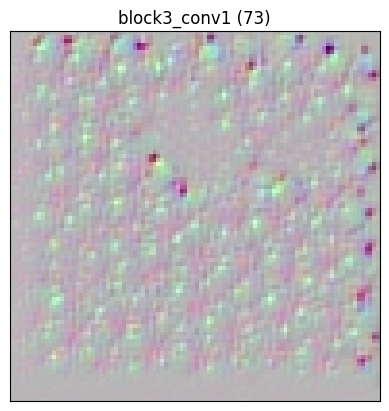

In [14]:
layer_name = 'block3_conv1' #@param []
visualize_filter(layer_name=layer_name)